In [23]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
print(data.isnull().sum())
print(data.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


In [24]:
data['Age'] = data['Age'].fillna(value=data['Age'].median())
#This isnt as influential so it doesnt really matter
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])
#Also mostly unimportant
data['Cabin'] = data['Cabin'].fillna('N/A')

#Removing Outliers (We notice from above that 75% to max is extremely large in age and fare)

# use quartiles to detect outliers
Q1_age = data['Age'].quantile(0.25)
Q3_age = data['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# use quartile +/- 1.5*IQR to detect outliers
age_outliers = data[(data['Age'] < (Q1_age - 1.5 * IQR_age)) | (data['Age'] > (Q3_age + 1.5 * IQR_age))]

# use quartiles to detect outliers
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# use quartile +/- 1.5*IQR to detect outliers
fare_outliers = data[(data['Fare'] < (Q1_fare - 1.5 * IQR_fare)) | (data['Fare'] > (Q3_fare + 1.5 * IQR_fare))]

# combine outliers
outliers = pd.concat([age_outliers, fare_outliers]).drop_duplicates()

# remove all outliers
data = data[~data.index.isin(outliers.index)]

print(f"Removed outlier in Age where age was lower than {Q1_age - 1.5 * IQR_age} or higher than {Q3_age + 1.5 * IQR_age}")
print(f"Removed outlier in Fare where age was lower than {Q1_fare - 1.5 * IQR_fare} or higher than {Q3_fare + 1.5 * IQR_fare}")
print(data.isnull().sum())

Removed outlier in Age where age was lower than 2.5 or higher than 54.5
Removed outlier in Fare where age was lower than -26.724 or higher than 65.6344
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


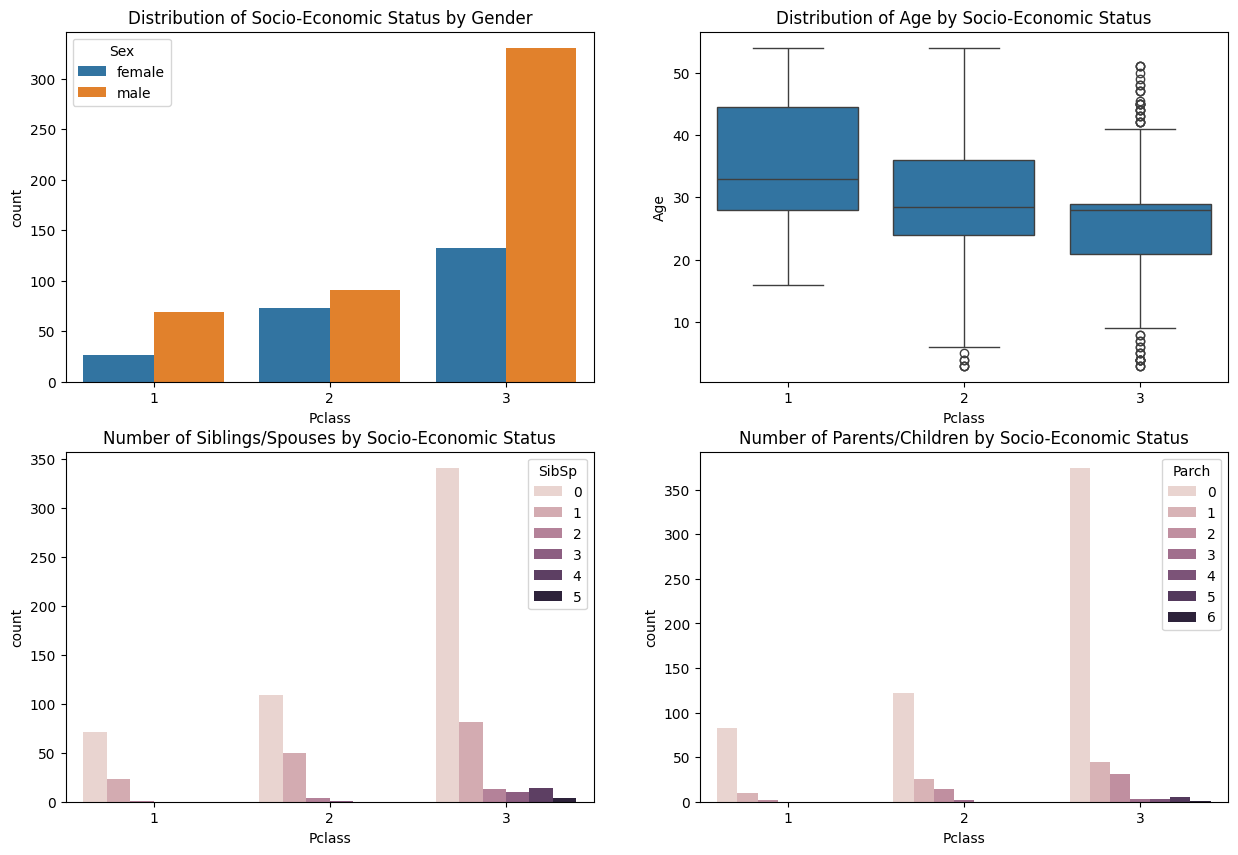

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10)) #initialize a 2x2 grid for adding 4 different plots

#X is Pclass, Y is Sex
sns.countplot(ax=axs[0, 0], x='Pclass', hue='Sex', data=data)
axs[0, 0].set_title('Distribution of Socio-Economic Status by Gender')

#X is Pclass, Y is Age
sns.boxplot(ax=axs[0, 1], x='Pclass', y='Age', data=data)
axs[0, 1].set_title('Distribution of Age by Socio-Economic Status')

#X is Pclass, Y is Siblings/Spouses
sns.countplot(ax=axs[1, 0], x='Pclass', hue='SibSp', data=data)
axs[1, 0].set_title('Number of Siblings/Spouses by Socio-Economic Status')

#X is Pclass, Y is Parents/Children
sns.countplot(ax=axs[1, 1], x='Pclass', hue='Parch', data=data)
axs[1, 1].set_title('Number of Parents/Children by Socio-Economic Status')

plt.show()

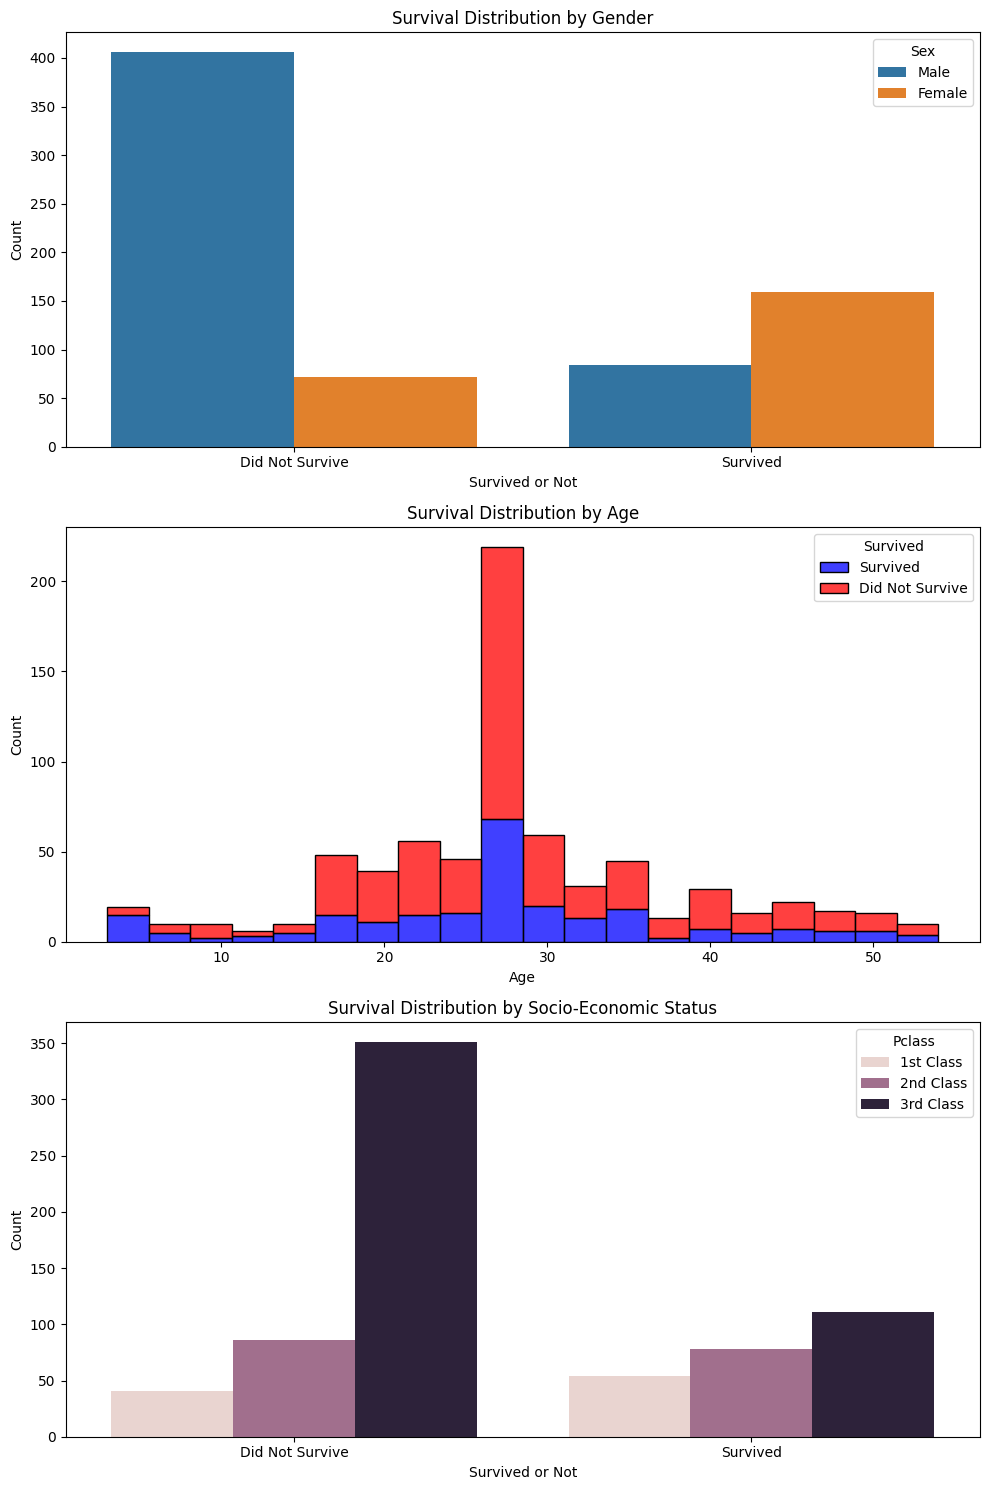

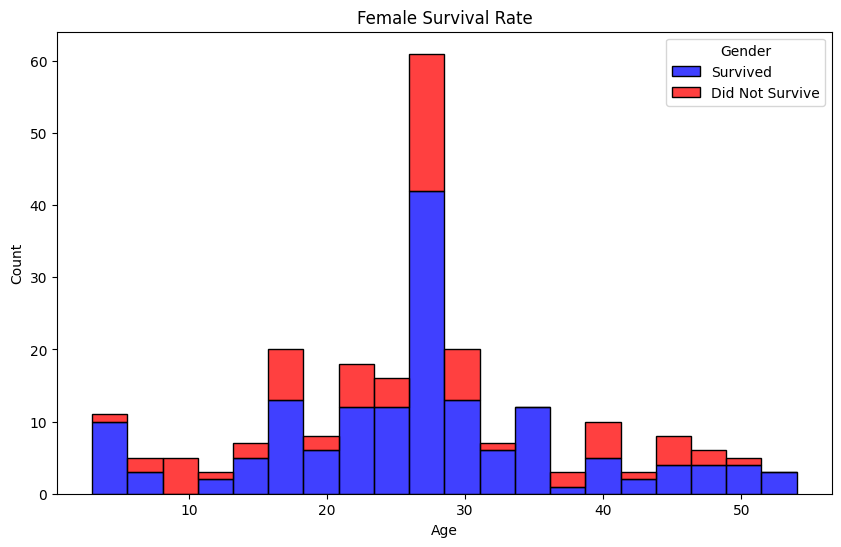

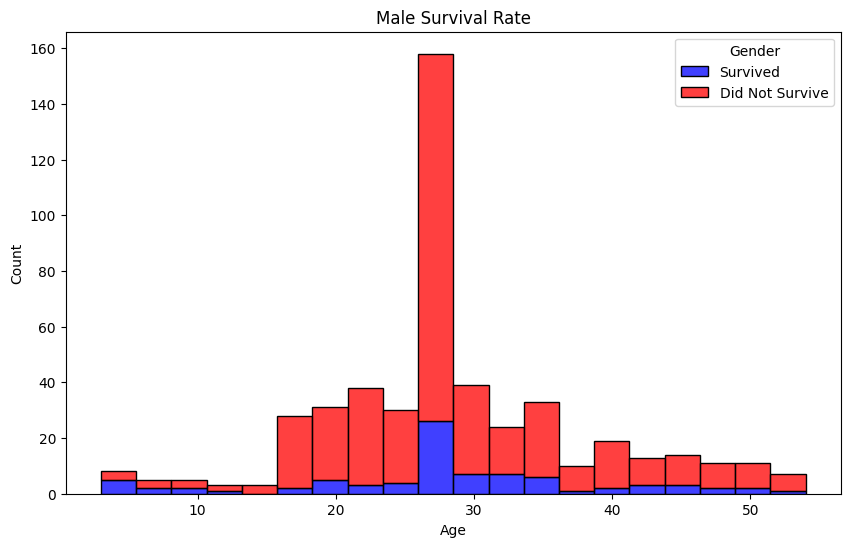

In [26]:
data_copy = data.copy()
data_copy['Sex'] = data_copy['Sex'].map({'male': 0, 'female': 1})
data_copy['Embarked'] = data_copy['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
# By Gender
sns.countplot(ax=axs[0], x='Survived', hue='Sex', data=data_copy)
axs[0].set_title('Survival Distribution by Gender')
axs[0].set_xlabel('Survived or Not')
axs[0].set_ylabel('Count')
axs[0].legend(title='Sex', labels=['Male', 'Female'])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Did Not Survive', 'Survived'])

#  By Age
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=20, ax=axs[1], palette={0: 'red', 1: 'blue'})
axs[1].set_title('Survival Distribution by Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].legend(title='Survived', labels=['Survived', 'Did Not Survive'])

# By Socio-Economic Status (SES)
#pclass: A proxy for socio-economic status (SES) 1st = Upper  //  2nd = Middle  //  3rd = Lower
sns.countplot(ax=axs[2], x='Survived', hue='Pclass', data=data_copy)
axs[2].set_title('Survival Distribution by Socio-Economic Status')
axs[2].set_xlabel('Survived or Not')
axs[2].set_ylabel('Count')
axs[2].legend(title='Pclass', labels=['1st Class', '2nd Class', '3rd Class'])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Did Not Survive', 'Survived'])

plt.tight_layout()
plt.show()


# 1 = survived, 0 = died -- For survivability, red is did not survive, blue is survived
female_data = data[data['Sex'] == "female"] # filter the data for onl females

# Plot the distribution of survival by age for only females
plt.figure(figsize=(10, 6))
sns.histplot(data=female_data, x='Age', hue='Survived', multiple='stack', bins=20, palette={0: 'red', 1: 'blue'})
plt.title('Female Survival Rate')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Survived', 'Did Not Survive'])
plt.show()


male_data = data[data['Sex'] == "male"] #filter the data for only males
# Plot the distribution of survival by age for only males
plt.figure(figsize=(10, 6))
sns.histplot(data=male_data, x='Age', hue='Survived', multiple='stack', bins=20, palette={0: 'red', 1: 'blue'})
plt.title('Male Survival Rate')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Survived', 'Did Not Survive'])
plt.show()

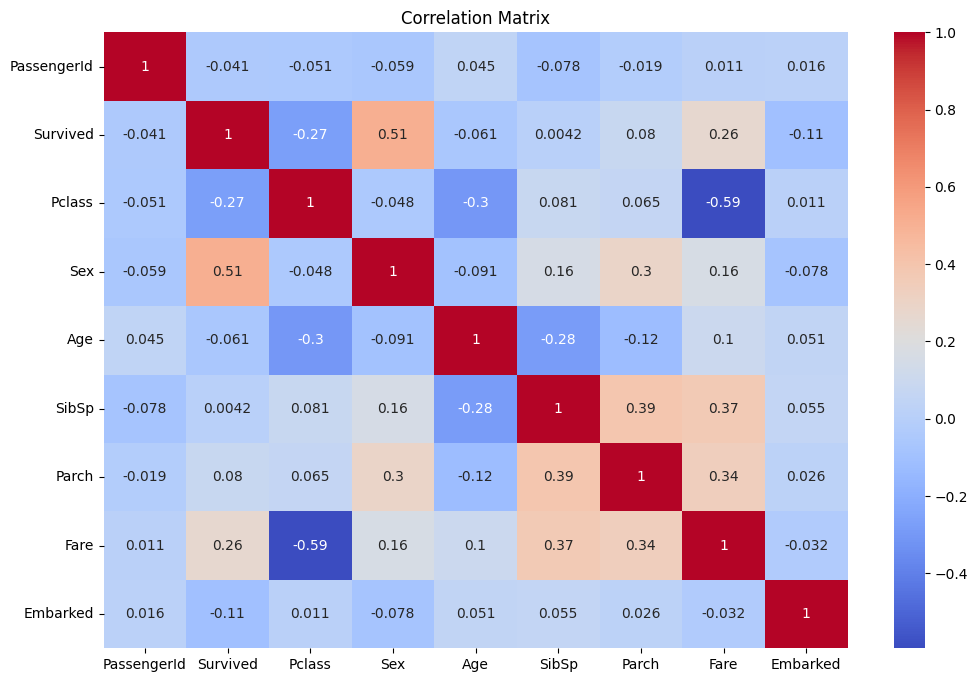

In [27]:
# Correlation Analysis
data_copy = data.copy() #copy again, using same var
data_copy['Sex'] = data_copy['Sex'].map({'male': 0, 'female': 1})
data_copy['Embarked'] = data_copy['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Correlation matrix
corr_matrix = data_copy.corr(numeric_only=True)


X = data_copy.drop(['Name', 'Ticket'], axis=1)
y = data_copy['Survived']

fig, axs = plt.subplots(1, 1, figsize=(12, 8))

sns.heatmap(ax=axs, data=corr_matrix, annot=True, cmap='coolwarm')
axs.set_title('Correlation Matrix')

plt.show()

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv('train.csv')



data['Age'] = data['Age'].fillna(value=data['Age'].median())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].median())
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Missing')



data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


# 
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = data[features] 
Y = data['Survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 



Q1_age = X_train['Age'].quantile(0.25)
Q3_age = X_train['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age


age_outliers = X_train[(X_train['Age'] < (Q1_age - 1.5 * IQR_age)) | (X_train['Age'] > (Q3_age + 1.5 * IQR_age))]


Q1_fare = X_train['Fare'].quantile(0.25)
Q3_fare = X_train['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Same equation as used for Age
fare_outliers = X_train[(X_train['Fare'] < (Q1_fare - 1.5 * IQR_fare)) | (X_train['Fare'] > (Q3_fare + 1.5 * IQR_fare))]


outliers = pd.concat([age_outliers, fare_outliers]).drop_duplicates()


X_train = X_train[~X_train.index.isin(outliers.index)]
Y_train = Y_train[~Y_train.index.isin(outliers.index)]

In [29]:
#Model 1: Logistic Regression

logreg = LogisticRegression()


cv_scores = cross_val_score(logreg, X_train, Y_train, cv=5) 
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

logreg.fit(X_train, Y_train)


Y_pred_logreg = logreg.predict(X_test) 
print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_logreg):.4f}")


precision_logreg = precision_score(Y_test, Y_pred_logreg)
recall_logreg = recall_score(Y_test, Y_pred_logreg)
f1_logreg = f1_score(Y_test, Y_pred_logreg)

 

print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F-score: {f1_logreg:.4f}")

Cross-validation scores: [0.81896552 0.78448276 0.77586207 0.74137931 0.84482759]
Average cross-validation score: 0.7931034482758621

Logistic Regression Model:
Accuracy: 0.8045
Precision: 0.7910
Recall: 0.7162
F-score: 0.7518


In [30]:
#Model 2: K-Nearest-Neigbors
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)


cv_scores = cross_val_score(knn, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

knn.fit(X_train, Y_train) # train

y_pred_knn = knn.predict(X_test) # predict
print("\nK-Nearest Neighbors (KNN) Model:")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_knn):.4f}")


precision_knn = precision_score(Y_test, y_pred_knn)
recall_knn = recall_score(Y_test, y_pred_knn)
f1_knn = f1_score(Y_test, y_pred_knn)

 

print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F-score: {f1_knn:.4f}")

Cross-validation scores: [0.68965517 0.64655172 0.73275862 0.75862069 0.73275862]
Average cross-validation score: 0.7120689655172414

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.6480
Precision: 0.6341
Recall: 0.3514
F-score: 0.4522


In [31]:
# Model 3: Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier


gb = GradientBoostingClassifier(n_estimators=100, random_state=1)  
 
cv_scores = cross_val_score(gb, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

gb.fit(X_train, Y_train) # train

y_pred_gbc = gb.predict(X_test) # predict

print("\nGradient Boosting Classifier (GB) Model:")
print(f"Accuracy: {accuracy_score(Y_test, y_pred_gbc):.4f}")

# Precision, Recall, F-score:
precision_gb = precision_score(Y_test, y_pred_gbc)
recall_gb = recall_score(Y_test, y_pred_gbc)
f1_gb = f1_score(Y_test, y_pred_gbc)


print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F-score: {f1_gb:.4f}")

Cross-validation scores: [0.81034483 0.81034483 0.82758621 0.8362069  0.81034483]
Average cross-validation score: 0.8189655172413793

Gradient Boosting Classifier (GB) Model:
Accuracy: 0.7989
Precision: 0.8393
Recall: 0.6351
F-score: 0.7231
